In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("menu.csv")
data.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
data.shape

(260, 24)

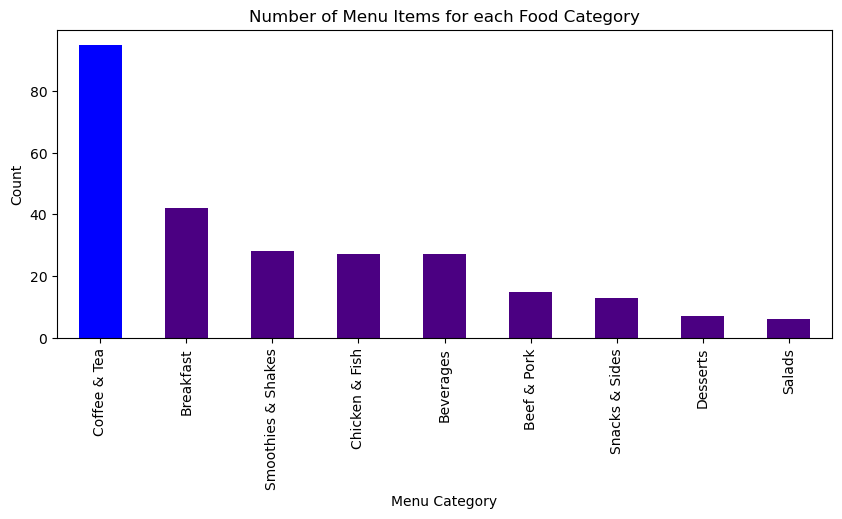

In [4]:
plt.figure(figsize=(10, 4), dpi=100) 
menu_category = data.Category.value_counts() 
menu_category.plot.bar(color = ['blue','indigo','indigo','indigo','indigo','indigo','indigo','indigo','indigo']) 
plt.title("Number of Menu Items for each Food Category") 
plt.ylabel("Count") 
plt.xlabel("Menu Category") 
plt.xticks(rotation=90) 
plt.show()

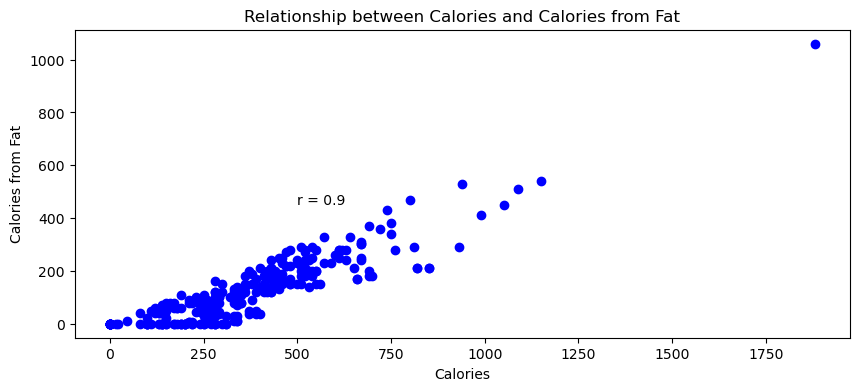

In [5]:
plt.figure(figsize=(10, 4), dpi=100)

correlation = data['Calories'].corr(data['Calories from Fat'])
plt.scatter(data.Calories, data['Calories from Fat'], color='blue')
plt.text(500,450,'r = {}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories from Fat")
plt.title("Relationship between Calories and Calories from Fat")
plt.show()

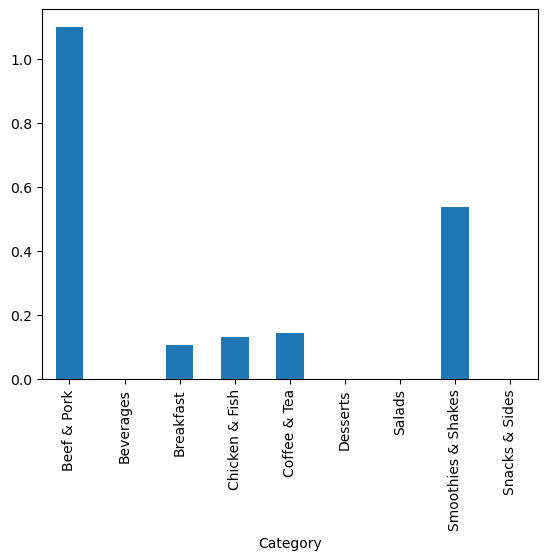

In [6]:
data.groupby('Category')['Trans Fat'].mean().plot(kind='bar')
plt.show()

In [7]:
data['saturated_cholesterol'] = data['Saturated Fat']/data['Cholesterol']*100

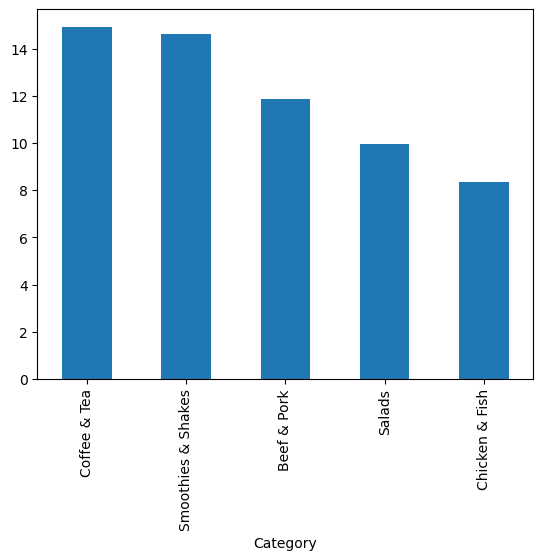

In [8]:
saturated_cholesterol = data.groupby('Category')['saturated_cholesterol'].mean()

# 删除任何缺失值（NaN）并选择5个最大值
saturated_cholesterol = saturated_cholesterol.dropna().nlargest(5)

# 用柱状图表示结果
saturated_cholesterol.plot(kind='bar')
plt.show()

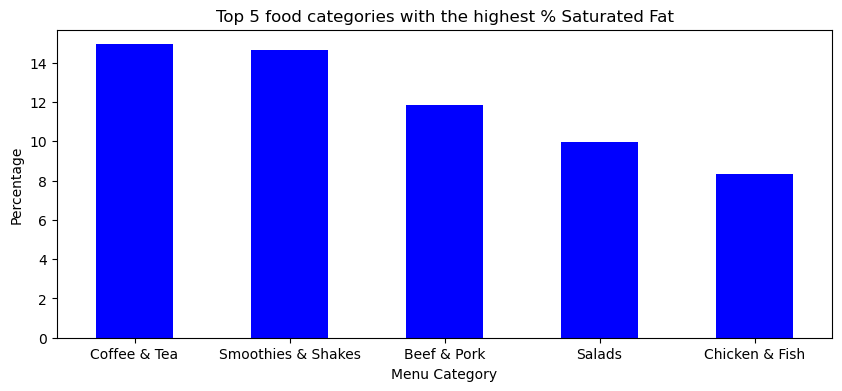

In [9]:
plt.figure(figsize=(10, 4), dpi=100)
saturated_cholesterol.sort_values(ascending=False).plot.bar(color = 'blue')
plt.title("Top 5 food categories with the highest % Saturated Fat")
plt.ylabel("Percentage")
plt.xlabel("Menu Category")
plt.xticks(rotation=0)
plt.show();

In [10]:
coffee_tea = data[data.Category == 'Coffee & Tea']
coffee_tea.groupby('Item')['saturated_cholesterol'].mean().sort_values(ascending=False)

Item
Frappé Chocolate Chip (Small)     21.538462
Frappé Chocolate Chip (Medium)    21.250000
Frappé Chocolate Chip (Large)     21.052632
Hazelnut Iced Coffee (Small)      20.000000
Hazelnut Latte (Medium)           20.000000
                                    ...    
Iced Tea (Small)                        NaN
Sweet Tea (Child)                       NaN
Sweet Tea (Large)                       NaN
Sweet Tea (Medium)                      NaN
Sweet Tea (Small)                       NaN
Name: saturated_cholesterol, Length: 95, dtype: float64

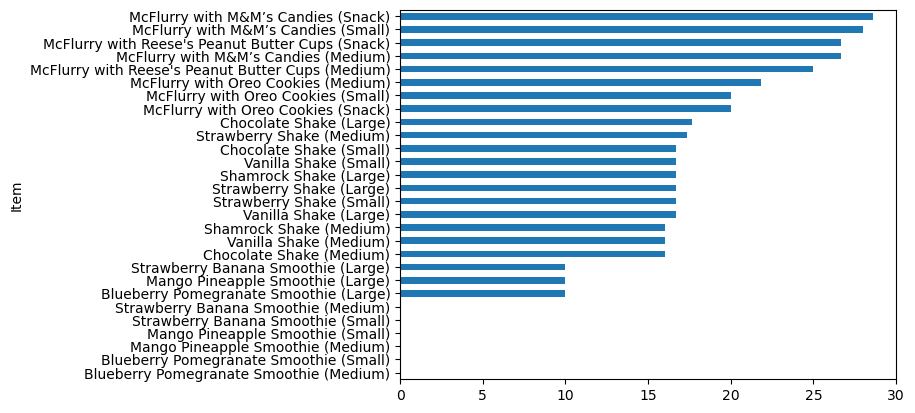

In [11]:
shakes = data[data.Category == 'Smoothies & Shakes']
grouped = shakes.groupby('Item')['saturated_cholesterol'].mean().sort_values()
grouped.plot(kind='barh')
plt.show()

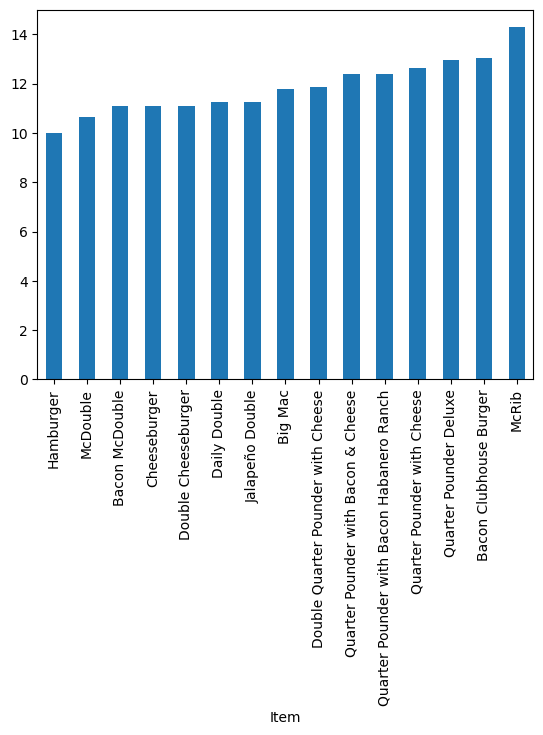

In [12]:
df = data[data['Category'] == 'Beef & Pork']
df = df.groupby('Item')['saturated_cholesterol'].mean().sort_values()
df.plot(kind='bar')
plt.show()

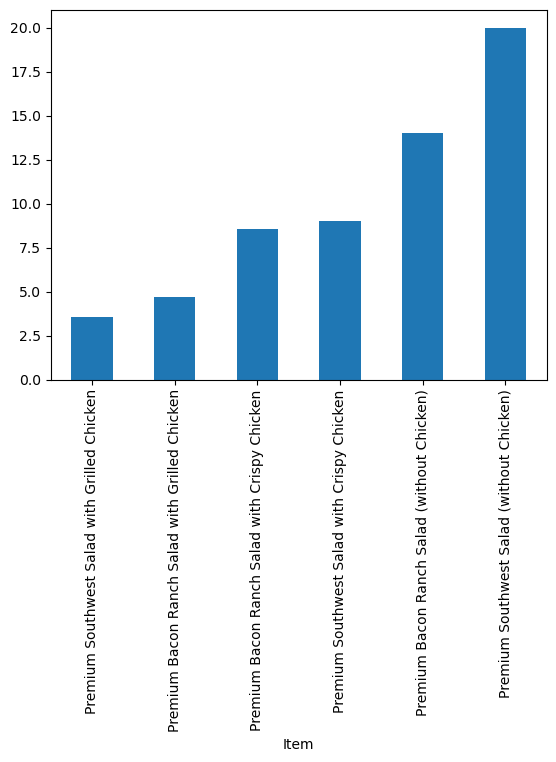

In [13]:
salads = data[data.Category == 'Salads']
grouped = salads.groupby('Item')['saturated_cholesterol'].mean().sort_values()
grouped.plot(kind='bar')
plt.show()

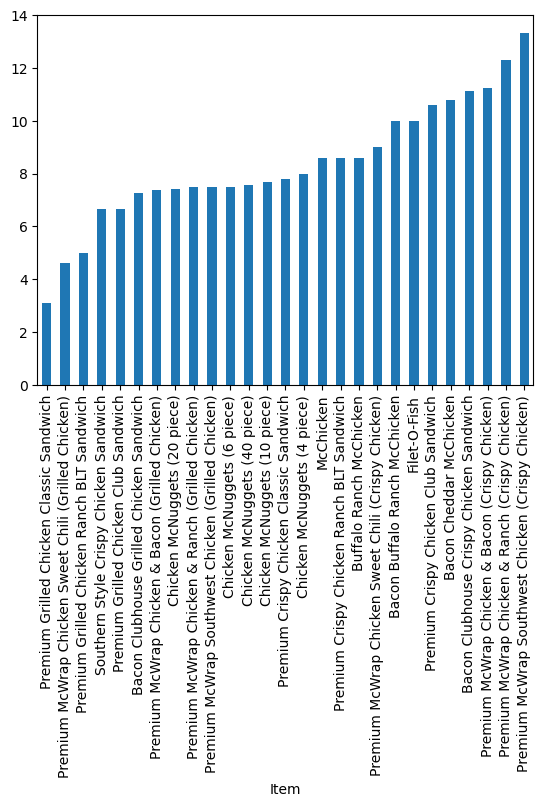

In [14]:
chicken_fish = data[data.Category == 'Chicken & Fish']
grouped = chicken_fish.groupby('Item')['saturated_cholesterol'].mean().sort_values()
grouped.plot(kind='bar')
plt.show()

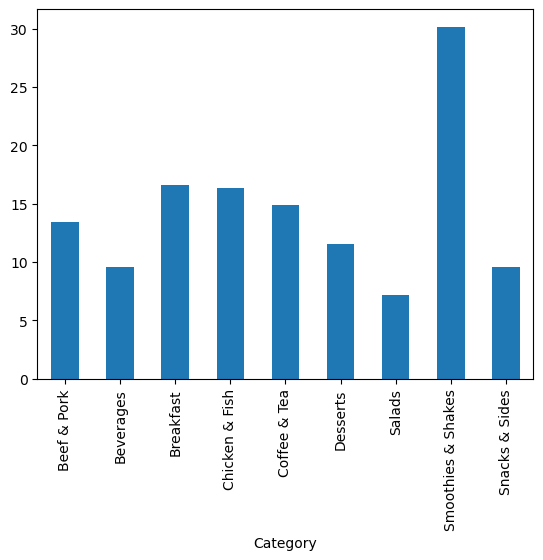

In [15]:
df = data.groupby('Category')['Carbohydrates (% Daily Value)'].mean()
df.plot(kind='bar')
plt.show()

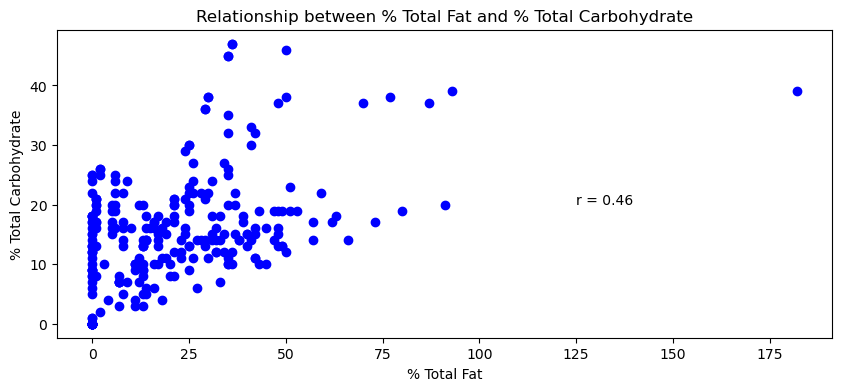

In [16]:
plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(data['Total Fat (% Daily Value)'], data['Carbohydrates (% Daily Value)'], color='blue')
correlation = data['Total Fat (% Daily Value)'].corr(data['Carbohydrates (% Daily Value)'])
plt.text(125,20,'r = {}'.format(round(correlation,2)))
plt.xlabel("% Total Fat")
plt.ylabel("% Total Carbohydrate")
plt.title("Relationship between % Total Fat and % Total Carbohydrate")
plt.show()

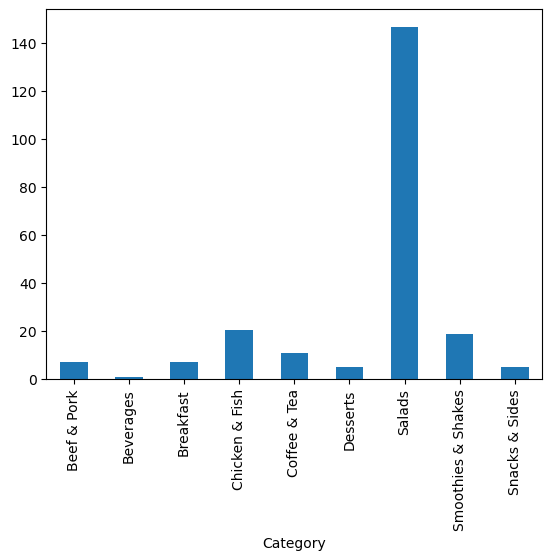

In [17]:
data.groupby('Category')['Vitamin A (% Daily Value)'].mean().plot(kind='bar')
plt.show()

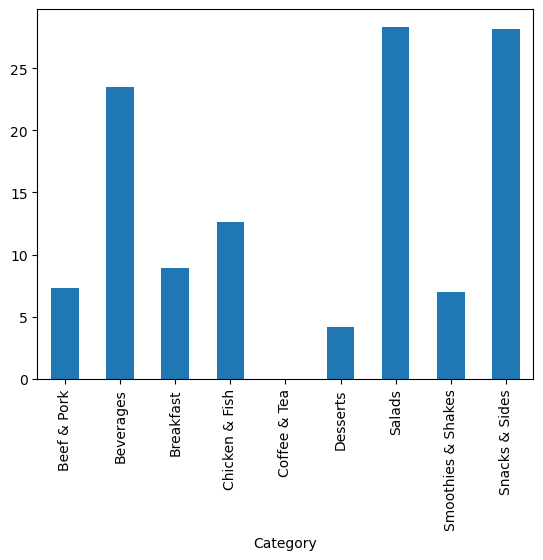

In [18]:
data.groupby('Category')['Vitamin C (% Daily Value)'].mean().plot(kind='bar')
plt.show()

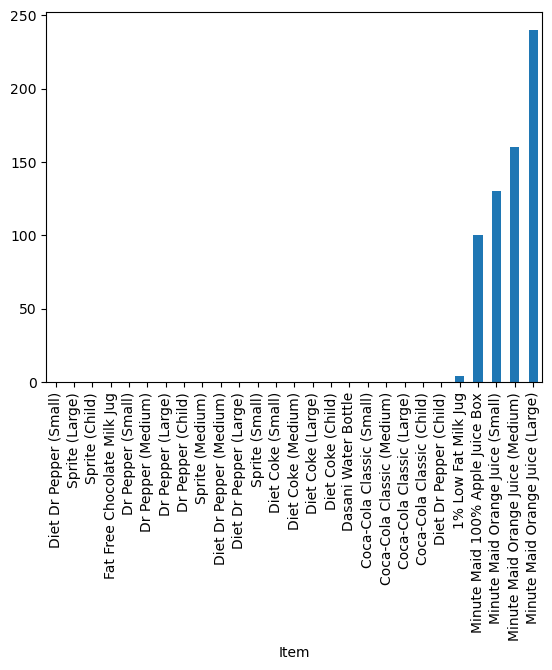

In [19]:
beverage = data[data.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values().plot(kind='bar')
plt.show()

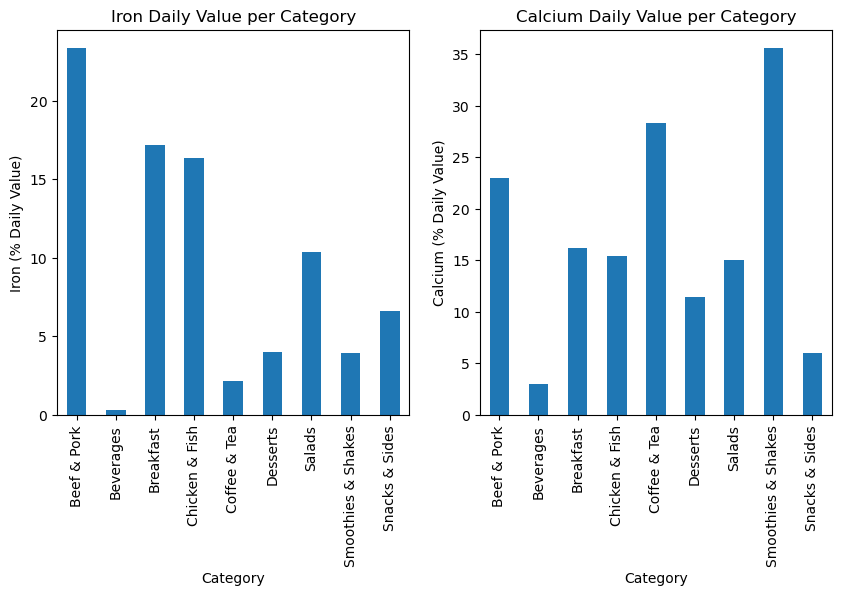

In [20]:
iron = data.groupby('Category')['Iron (% Daily Value)'].mean()
calcium = data.groupby('Category')['Calcium (% Daily Value)'].mean()

fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Category')
ax1.set_ylabel('Iron (% Daily Value)')
ax1.set_title("Iron Daily Value per Category")
iron.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Category')
ax2.set_ylabel('Calcium (% Daily Value)')
ax2.set_title("Calcium Daily Value per Category")
calcium.plot(kind='bar')

plt.show()

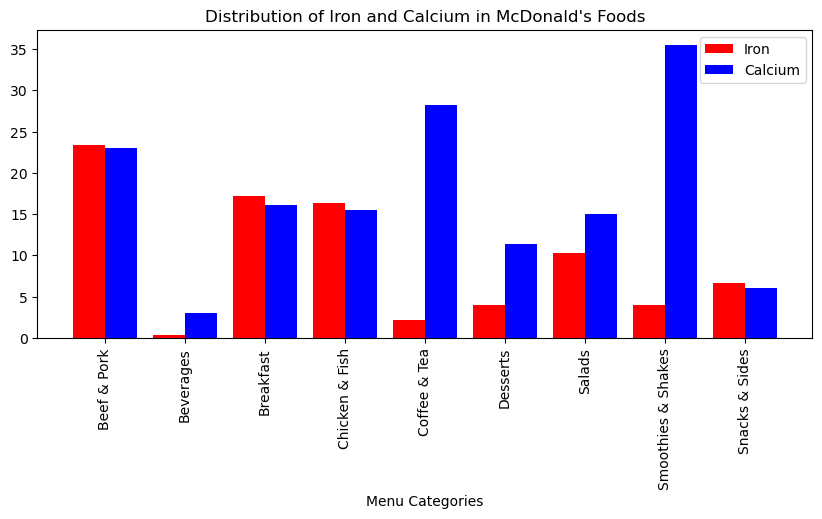

In [21]:
plt.figure(figsize=(10, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'red')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'blue')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=90)
plt.legend()
plt.show()